<a href="https://colab.research.google.com/github/CAUKimJisu/Deep.Learn4AI_CAU/blob/main/week3/chapter02_mathematical-building-blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [78]:
import tensorflow #R)library와 유사

In [79]:
from tensorflow.keras.datasets import mnist #mnist는 tensorflow라는 데이터셋 안에 존재하는 데이터
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [80]:
train_images.shape #shape(): 배열의 형태 #28x28형태 #What is dimension for each data? >> 28, 28

(60000, 28, 28)

In [81]:
len(train_labels) #len : 길이

60000

In [82]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [83]:
test_images.shape #How many samples in Mnist test dataset >> 10000

(10000, 28, 28)

In [84]:
len(test_labels)

10000

In [85]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [86]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [87]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
#optimizer / 옵티마이저 : 성능을 향상시키기 위해 입력된 데이터를 기반으로 모델을 업데이트하는 메커니즘
#loss (function) / 손실 함수 : 훈련 데이터에서 모델의 성능을 측정하는 방법으로 모델이 옳은 방향으로 학습될 수 있도록 도와줌

**Preparing the image data**

In [88]:
train_images[0].shape

(28, 28)

In [89]:
train_images = train_images.reshape((60000, 28 * 28)) #reshape
train_images = train_images.astype("float32") / 255 #normalization > training speed get faster
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [90]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2638 - accuracy: 0.9236
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1068 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0692 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0509 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0378 - accuracy: 0.9887


**Using the model to make predictions**

In [91]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 51ms/step


array([2.1588097e-08, 7.7095503e-09, 3.4001087e-06, 6.9255766e-05,
       3.4925850e-11, 7.8778235e-08, 2.3624518e-12, 9.9991918e-01,
       2.1872890e-07, 7.7804480e-06], dtype=float32)

In [92]:
predictions[0].argmax()

7

In [93]:
predictions[0][7]

0.9999192

In [94]:
test_labels[0]

7

**Evaluating the model on new data**

In [95]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0611 - accuracy: 0.9817
test_acc: 0.9817000031471252


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [96]:
import numpy as np
x = np.array(12)
x

array(12)

In [97]:
x.ndim

0

### Vectors (rank-1 tensors)

In [98]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [99]:
x.ndim

1

### Matrices (rank-2 tensors)

In [100]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [101]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [102]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
#.ndim / .shape / .dtype

In [103]:
train_images.ndim

3

In [104]:
train_images.shape

(60000, 28, 28)

In [105]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

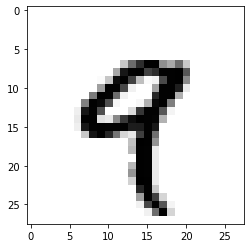

In [106]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [107]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [108]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [109]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [110]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [111]:
my_slice = train_images[:, 14:, 14:]

In [112]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

In [113]:
batch = train_images[:128]

In [114]:
batch = train_images[128:256]

In [115]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [155]:
import numpy as np
x = np.array([[1, 2, 3], [1, 0, -4]])
x

array([[ 1,  2,  3],
       [ 1,  0, -4]])

In [156]:
naive_relu(x)

array([[1, 2, 3],
       [1, 0, 0]])

In [116]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [117]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy() #.copy()하지 않을 경우, 출력된 값 x값에 저장됨 > x 변수값 변동 #cf.R).copy() 사용하지 않아도 괜찮음
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [118]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))
#아래와 비교했을 때, 속도 빨라짐

Took: 0.01 s


In [119]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.62 s


### Broadcasting

In [120]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [121]:
y = np.expand_dims(y, axis=0)

In [122]:
Y = np.concatenate([y] * 32, axis=0)

In [123]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [124]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [125]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [126]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [127]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [128]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [129]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [130]:
train_images = train_images.reshape((60000, 28 * 28))

In [131]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [132]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [133]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [134]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [135]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [136]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [137]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [138]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [139]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [140]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2639 - accuracy: 0.9231
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1083 - accuracy: 0.9684
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0706 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0503 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0381 - accuracy: 0.9887


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [141]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [142]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [143]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [144]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [145]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [146]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [147]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [148]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [149]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 4.82
loss at batch 100: 2.24
loss at batch 200: 2.23
loss at batch 300: 2.11
loss at batch 400: 2.27
Epoch 1
loss at batch 0: 1.95
loss at batch 100: 1.89
loss at batch 200: 1.85
loss at batch 300: 1.75
loss at batch 400: 1.88
Epoch 2
loss at batch 0: 1.63
loss at batch 100: 1.59
loss at batch 200: 1.53
loss at batch 300: 1.45
loss at batch 400: 1.55
Epoch 3
loss at batch 0: 1.36
loss at batch 100: 1.35
loss at batch 200: 1.26
loss at batch 300: 1.23
loss at batch 400: 1.31
Epoch 4
loss at batch 0: 1.16
loss at batch 100: 1.17
loss at batch 200: 1.05
loss at batch 300: 1.06
loss at batch 400: 1.13
Epoch 5
loss at batch 0: 1.01
loss at batch 100: 1.03
loss at batch 200: 0.91
loss at batch 300: 0.94
loss at batch 400: 1.01
Epoch 6
loss at batch 0: 0.90
loss at batch 100: 0.92
loss at batch 200: 0.81
loss at batch 300: 0.85
loss at batch 400: 0.92
Epoch 7
loss at batch 0: 0.81
loss at batch 100: 0.83
loss at batch 200: 0.73
loss at batch 300: 0.77
loss at batch 40

### Evaluating the model

In [150]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.82


## Summary